In [1]:
import OmicsUtils.pydeseq_utils as pydeseq_utils
import pandas as pd

## I. Process Counts data

## 1.1 Read in counts data and metadata

In [2]:
count_data_kidney_cancer = pd.read_csv('./Transcriptomics/data/processed_data/stranded_first_data_with_labels.csv')
count_data_kidney_cancer
count_data_kidney_cancer[['Case ID', 'Project ID']]
kidney_cancer_count_data = count_data_kidney_cancer.iloc[:, :60660].T
counts = kidney_cancer_count_data.copy().reset_index()
counts = counts.set_index('index')
counts

,0,1,2,3,4,5,6,7,8,9,...,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642
index,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,4,677,1561,2296,4929,6,1340,1,2,2383,...,1,5554,8,2538,2005,0,1774,2,1928,2
ENSG00000000005.6,12,6,1,96,8,4,0,22,26,191,...,1,18,1,3,8,1,9,8,3,6
ENSG00000000419.13,9,499,693,714,936,13,904,15,8,840,...,8,948,17,984,482,8,1122,10,991,7
ENSG00000000457.14,294,457,175,456,841,251,394,410,961,835,...,311,798,1112,1325,341,300,332,142,461,185
ENSG00000000460.17,366,242,90,185,367,262,227,371,270,489,...,317,351,883,1062,189,291,204,322,280,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
ENSG00000288670.1,0,168,400,455,159,4,348,1,0,377,...,0,712,7,366,172,0,258,2,288,1
ENSG00000288671.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.2. Transpose the data for deseq2

In [3]:
counts = counts.T
counts = pd.concat( [count_data_kidney_cancer[['Case ID']], counts],axis=1)

In [11]:
counts.rename(columns={'Case ID':'Geneid'}, inplace=True)
counts.set_index('Geneid', inplace=True)
counts.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
Geneid,,,,,,,,,,,,,,,,,,,,,
C3L-00966,4,12,9,294,366,1,22,87,9,11,...,0,0,1,0,0,0,0,0,4,16
TCGA-MM-A563,677,6,499,457,242,1046,2378,1263,616,383,...,0,0,10,0,0,0,168,0,7,27
TCGA-GL-8500,1561,1,693,175,90,95,53,3168,1540,682,...,0,0,6,0,0,0,400,0,0,30
TCGA-BQ-5877,2296,96,714,456,185,195,1120,3311,1722,606,...,0,0,0,0,0,0,455,0,2,5
TCGA-KN-8423,4929,8,936,841,367,152,271,3019,1440,639,...,0,0,11,0,0,0,159,0,0,27


## II. Metadata pre-processing

## 2.1. Create a metadata dataframe with Case ID and Cancer subtype 

Only 3 cancers from TCGA (Renal Cell Carcinoma) are included in this

In [5]:
metadata = count_data_kidney_cancer[['Case ID', 'Project ID']]
metadata.columns = ['Sample', 'Condition']
metadata = metadata.set_index(keys='Sample') 
TCGA_rcc_metadata = metadata[metadata['Condition'].isin(values=['TCGA-KIRC', 'TCGA-KIRP', 'TCGA-KICH'])]
TCGA_rcc_metadata

,Condition
Sample,
TCGA-MM-A563,TCGA-KIRC
TCGA-GL-8500,TCGA-KIRP
TCGA-BQ-5877,TCGA-KIRP
TCGA-KN-8423,TCGA-KICH
TCGA-5P-A9K0,TCGA-KIRP
...,...
TCGA-CW-6087,TCGA-KIRC
TCGA-BQ-5884,TCGA-KIRP
TCGA-AK-3456,TCGA-KIRC


## 2.2. Subset the counts data to only include the 3 cancers

In [12]:
counts_rcc = counts[counts.index.isin(TCGA_rcc_metadata.index.values)]

In [13]:
counts_rcc

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
Geneid,,,,,,,,,,,,,,,,,,,,,
TCGA-MM-A563,677,6,499,457,242,1046,2378,1263,616,383,...,0,0,10,0,0,0,168,0,7,27
TCGA-GL-8500,1561,1,693,175,90,95,53,3168,1540,682,...,0,0,6,0,0,0,400,0,0,30
TCGA-BQ-5877,2296,96,714,456,185,195,1120,3311,1722,606,...,0,0,0,0,0,0,455,0,2,5
TCGA-KN-8423,4929,8,936,841,367,152,271,3019,1440,639,...,0,0,11,0,0,0,159,0,0,27
TCGA-5P-A9K0,1340,0,904,394,227,408,372,4145,943,453,...,0,0,16,0,0,0,348,0,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CW-6087,5554,18,948,798,351,180,887,2678,1032,775,...,0,0,6,0,0,0,712,0,1,10
TCGA-BQ-5884,2538,3,984,1325,1062,793,359,11876,2485,1101,...,0,0,3,0,0,0,366,0,2,56
TCGA-AK-3456,2005,8,482,341,189,280,1564,4336,1589,764,...,0,0,4,0,0,0,172,0,1,14


## III. Running Deseq2

In [24]:
from importlib import reload
import OmicsUtils.pydeseq_utils as pydeseq_utils
reload(pydeseq_utils)

<module 'OmicsUtils.pydeseq_utils' from '/Users/abhilashdhal/Projects/OmicsUtils/pydeseq_utils.py'>

In [25]:
## Initialize the pydeseq_utils object
pydeseq_obj = pydeseq_utils.PyDeSeqWrapper(count_matrix=counts_rcc, metadata=TCGA_rcc_metadata, design_factors='Condition', group1='TCGA-KIRC', group2='TCGA-KIRP')
result = pydeseq_obj.run_deseq()

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Fitting size factors...
... done in 0.74 seconds.

Fitting dispersions...
... done in 13.36 seconds.

Fitting dispersion trend curve...
... done in 4.65 seconds.

Fitting MAP dispersions...
... done in 16.21 seconds.

Fitting LFCs...
... done in 42.27 seconds.

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
Refitting 10827 outliers.

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/home

Log2 fold change & Wald test p-value: Condition TCGA-KIRC vs TCGA-KIRP


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.15,1745.846969,-0.229056,0.054051,-4.237788,2.257328e-05,4.716019e-05
ENSG00000000005.6,24.765175,1.245152,0.164656,7.562141,3.964869e-14,1.391292e-13
ENSG00000000419.13,688.768193,0.013235,0.028567,0.463276,6.431665e-01,7.231618e-01
ENSG00000000457.14,456.921769,0.171048,0.031631,5.407658,6.385407e-08,1.593618e-07
ENSG00000000460.17,280.125529,0.348439,0.041999,8.296374,1.073368e-16,4.215969e-16
...,...,...,...,...,...,...
ENSG00000288669.1,0.164879,0.127490,0.423766,0.300851,7.635283e-01,NaN
ENSG00000288670.1,263.675230,-0.167515,0.038957,-4.300023,1.707803e-05,3.598875e-05
ENSG00000288671.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000288674.1,3.072331,0.264358,0.088761,2.978326,2.898276e-03,4.982204e-03


AttributeError: 'NoneType' object has no attribute 'results_df'

## IV. Data Interpretation of the results

In [15]:
import scanpy as sc

In [18]:
sc.tl.pca(pydeseq_obj.dds)

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


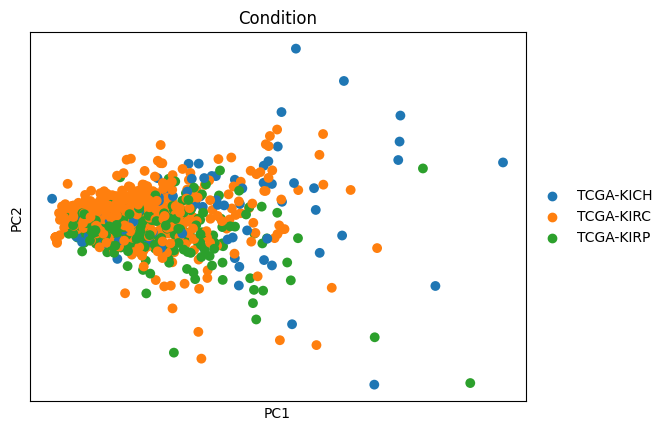

In [19]:
sc.pl.pca(pydeseq_obj.dds, color = 'Condition', size = 200)